In [107]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping

trdata = ImageDataGenerator()
train_images = trdata.flow_from_directory(directory=r"C:\Users\Khalid\Desktop\Project\PlantVillage\PlantVillage_test",target_size=(224,224), batch_size=16, shuffle=True)
tsdata = ImageDataGenerator()
test_images = tsdata.flow_from_directory(directory=r"C:\Users\Khalid\Desktop\Project\PlantVillage\PlantVillage_train", target_size=(224,224), batch_size=16, shuffle=True)


Found 14427 images belonging to 15 classes.
Found 6211 images belonging to 15 classes.


In [108]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="elu"))
model.add(Dense(units=4096,activation="sigmoid"))
model.add(Dense(units=15, activation="softmax"))

In [111]:
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [31]:
checkpoint = ModelCheckpoint("saved_model/model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(train_images, validation_data= test_images, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
902/902 [==============================] - ETA: 0s - loss: 2.1279 - accuracy: 0.3169
Epoch 1: val_accuracy improved from -inf to 0.59375, saving model to vgg16_1.h5
902/902 [==============================] - 207s 228ms/step - loss: 2.1279 - accuracy: 0.3169 - val_loss: 1.3883 - val_accuracy: 0.5938
Epoch 2/10
902/902 [==============================] - ETA: 0s - loss: 1.2604 - accuracy: 0.5929
Epoch 2: val_accuracy did not improve from 0.59375
902/902 [==============================] - 205s 227ms/step - loss: 1.2604 - accuracy: 0.5929 - val_loss: 1.3377 - val_accuracy: 0.5375
Epoch 3/10
902/902 [==============================] - ETA: 0s - loss: 0.8941 - accuracy: 0.7049
Epoch 3: val_accuracy improved from 0.59375 to 0.72500, saving model to vgg16_1.h5
902/902 [==============================] - 206s 228ms/step - loss: 0.8941 - accuracy: 0.7049 - val_loss: 0.8546 - val_accuracy: 0.7250
Epoch 4/10
902/902 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.77

In [33]:
loss, acc = model.evaluate(train_images, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

389/389 - 30s - loss: 0.3090 - accuracy: 0.8997 - 30s/epoch - 77ms/step
Trained model, accuracy: 89.97%


In [34]:
model.save('saved_model/model.h5')

INFO:tensorflow:Assets written to: saved_model/vgg16_model_70-30\assets


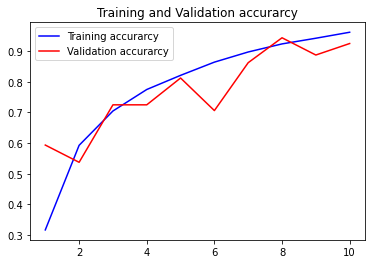

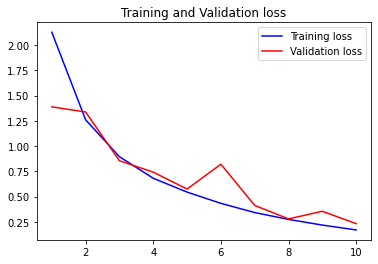

In [74]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()